# 1.0 - Importando as bibliotecas

- Aqui importamos todas as bibliotecas que são utilizadas nos codigos abaixo.

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.5 MB/s 


In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import sklearn
from sklearn import preprocessing
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, plot_roc_curve 
from sklearn.model_selection import cross_val_score, GridSearchCV,KFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from pandas.core.arrays.interval import value_counts 
from sklearn.model_selection import RandomizedSearchCV
import shap


drive = drive.mount('/content/drive/')

Mounted at /content/drive/


## Carregando os dataframes

In [ ]:
base = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Everymind")
reconhecimento = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Reconhecimento")
ambiente = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Ambiente de Trabalho 27.07")

Unknown extension is not supported and will be removed


# 2.0 - Análise dos Dados

## Explicação dos conjuntos



### Base
- **Matrícula**:: Matrícula do colaborador
- **Nome Completo**: Nome completo do colaborador - Dado codificado
- **Dt Admissao**: Data de admissão do colaborador na empresa
- **Dt Saida**: Data que o funcionário saiu da empresa - No caso de não ter saído é nulo (Dado já tratado)
- **Tipo Saida**: Tipo de saída do colaborador da empresa - No caso de não ter saído é nulo (Dado já tratado)
- **Cargo**: Cargo do colaborador na empresa
- **Salario Mês**: Salário mensal do colaborador
- **Dt Nascimento**: Data de nascimento do colaborador
- **Genero**: Gênero do colaborador - Masculino ou Feminino
- **Etnia**: Etnia declarada do colaborador - No caso de não ter sido especificada é "Não informada" (Dado já tratado)
- **Estado Civil**: Estado civil do colaborador
- **Escolaridade**: Grau de ensino do colaborador
- **Estado**: Estado de residência do colaborador
- **Cidade**: Cidade de residência do colaborador
- **Area**: Área que o colaborador trabalha na empresa
- **Idade**: Idade do colaborador com base na Dt Nascimento e no dia de hoje


---


### Reconhecimento
- **Matricula**: Matrícula do colaborador
- **Codinome**: Nome completo do colaborador - Dado codificado
- **Situação**: Situação do colaborador na empresa - Afastado, Ativo, ou Desligado
- **Data de Admissão**: Data de admissão do colaborador na empresa
- **Data Vigência**: Data de vigência do colaborador com o respectivo salário ou cargo
- **Novo Cargo**: Novo cargo que o colaborador recebeu
- **Novo Salario**: Novo salário que o colaborador recebeu
- **Motivo**: Motivo da promoção ou do aumento
- **Alterou Função**: Se o colaborador mudou de função


---


### Ambiente
- **Divisao**: Divisão em que os colaboradores atuam
- **Pilar**: Pilar de avaliação dos colaboradores
- **Pontuação**: Pontuação dos colaboradors nesse pilar
- **Fator**: Fator de avaliação dos colaboradores
- **Pontuação.1**: Pontuação dos colaboradors nesse fator
- **Pergunta**: Pergunta respondida pelos colaboradores
- **Pulou**: Porcentagem de pessoas que pulou essa avaliação
- **Muito Insatisfeito**: Porcentagem de votos "Muito Insatisfeito"
- **Insatisfeito**: Porcentagem de votos "Insatisfeito"
- **Neutro**: Porcentagem de votos "Neutro"
- **Satisfeito**: Porcentagem de votos "Satisfeito"
- **Muito Satisfeito**: Porcentagem de votos "Muito Satisfeito"
- **Taxa de Confiabilidade**: Taxa de confiabilidade da resposta na pergunta

In [ ]:
base.head()

,Matricula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade
0,2.0,Pessoa Colaboradora 247,2015-02-02 00:00:00,NaT,NaN,Gerente Sr,9914.4,1992-01-25,Masculino,Branca,Solteiro,Graduação,SP,São Paulo,CPG & Retail,30
1,3.0,Pessoa Colaboradora 92,26/03/2015,NaT,NaN,Gerente Sr,8250.0,1991-08-03,Masculino,Branca,Solteiro,Graduação,SP,Osasco,CPG & Retail,31
2,4.0,Pessoa Colaboradora 42,2015-04-05 00:00:00,NaT,NaN,Arquiteto Sr,9914.4,1988-03-05,Masculino,Branca,Solteiro,Graduação,SP,São Paulo,Education,34
3,7.0,Pessoa Colaboradora 291,2015-09-01 00:00:00,2021-10-29,Pedido de Demissão,Arquiteto,7000.0,1986-08-31,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,Core & Industrias,36
4,8.0,Pessoa Colaboradora 412,2015-12-07 00:00:00,2020-05-29,Pedido de Demissão,Dev Pl,2750.0,1994-06-27,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,CPG & Retail,28


In [ ]:
reconhecimento.head()

,Matricula,Codinome,Situação,Data de Admissão,Data Vigência,Novo Cargo,Novo Salario,Motivo,Alterou Função
0,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2020-07-01,Arquiteto,5200.0,PROMOÇÃO,Sim
1,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2020-11-01,Arquiteto,6000.0,MÉRITO,Não
2,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2021-08-01,Arquiteto,7000.0,MÉRITO,Não
3,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2021-11-01,Gerente Sr,9000.0,PROMOÇÃO,Sim
4,3.0,Pessoa Colaboradora 92,Ativo,2015-03-26,2020-07-01,Arquiteto,5200.0,PROMOÇÃO,Sim


In [ ]:
ambiente.head()

,Divisao,Pilar,Pontuação,Fator,Pontuação.1,Pergunta,Pulou,Muito Insatisfeito,Insatisfeito,Neutro,Satisfeito,Muito Satisfeito,Taxa de Confiabilidade
0,Vendas,Relacionamento com a equipe,"8,11",Colaboração,"8,33",A colaboração com colegas de outras equipes é ...,NaN,NaN,NaN,NaN,NaN,100%,Muito Baixo
1,AMS&PS,Relacionamento com a equipe,"8,36",Colaboração,"8,58",A colaboração com colegas de outras equipes é ...,NaN,NaN,12.5%,NaN,37.5%,50%,Baixo
2,Commerce,Relacionamento com a equipe,"8,66",Colaboração,9,A colaboração com colegas de outras equipes é ...,20%,NaN,10%,NaN,NaN,70%,Médio
3,CPG & Retail II,Relacionamento com a equipe,"8,71",Colaboração,"8,69",A colaboração com colegas de outras equipes é ...,NaN,NaN,20%,NaN,NaN,80%,Baixo
4,Core & Industrias I,Relacionamento com a equipe,"8,8",Colaboração,"8,93",A colaboração com colegas de outras equipes é ...,NaN,NaN,NaN,NaN,62.5%,37.5%,Muito Baixo


## Exploração dos dados

###2.1 Exploração gráfica

In [ ]:
baseHist = base
baseHist = baseHist.drop(['Matricula','Dt Admissao', 'Dt Saida','Dt Nascimento','Tipo Saida', 'Cargo','Dt Nascimento','Etnia','Nome Completo','Cidade'],axis=1)
def mostra_hist(coluna):
  hist = px.histogram(baseHist,x=coluna)
  hist.show()
for columns in baseHist:
  mostra_hist(columns)

In [ ]:
baseHistR = reconhecimento
baseHistR = reconhecimento.drop(['Alterou Função', 'Codinome','Data de Admissão','Data Vigência','Situação'], axis=1) 
def mostra_hist(coluna):
  hist = px.histogram(baseHistR,x=coluna)
  hist.show()
for columns in baseHistR:
  mostra_hist(columns)

In [ ]:
baseHistA = ambiente
baseHistA = ambiente.drop(['Pontuação.1','Pergunta','Pulou','Muito Insatisfeito', 'Insatisfeito','Neutro','Satisfeito','Muito Satisfeito','Taxa de Confiabilidade'], axis=1) 
def mostra_hist(coluna):
  hist = px.histogram(baseHistA,x=coluna)
  hist.show()
for columns in baseHistA:
  mostra_hist(columns)

In [ ]:
df = base
fig = px.scatter(df, x="Tipo Saida", y="Cidade", color="Estado",
                 )
fig.show()

In [ ]:
df = base
fig = px.scatter(df, x="Salario Mês", y="Area", color="Estado",
                 )
fig.show()

### 2.2 Tipo dos dados

Conferind tipos dos dados nas colunas da base, reconhecimento, e ambiente

In [ ]:
base.dtypes

Matricula               float64
Nome Completo            object
Dt Admissao              object
Dt Saida         datetime64[ns]
Tipo Saida               object
Cargo                    object
Salario Mês             float64
Dt Nascimento    datetime64[ns]
Genero                   object
Etnia                    object
Estado Civil             object
Escolaridade             object
Estado                   object
Cidade                   object
Area                     object
Idade                     int64
dtype: object

In [ ]:
reconhecimento.dtypes

Matricula                  float64
Codinome                    object
Situação                    object
Data de Admissão    datetime64[ns]
Data Vigência       datetime64[ns]
Novo Cargo                  object
Novo Salario               float64
Motivo                      object
Alterou Função              object
dtype: object

Descrição dos dados numéricos até então

In [ ]:
base.describe()

,Matricula,Salario Mês,Idade
count,475.000000,475.000000,475.000000
mean,283.223158,3333.420137,30.488421
std,147.244468,2466.854924,8.077249
min,2.000000,500.000000,18.000000
25%,159.000000,1497.412500,24.000000
50%,288.000000,2690.500000,29.000000
75%,409.500000,4500.000000,35.000000
max,530.000000,14282.245000,65.000000


# 3.0 Tratamento / Pré processamento dos dados


---
- Retirar dados que não serão usados
- Limpeza de dados nulos 

- Criação de label e hot encoder para variáveis categóricas 

In [ ]:
base = base.drop(['Nome Completo'], axis=1)
base = base.drop(['Etnia'], axis=1)

## 3.0.1 Criação dos Data Frames de uso
- Criação de novos df com colunas que serão utilizadas pelos modelos

Remoção das colunas Cidade, Dt Admissao, Dt Saida, Dt Nascimento na tabela base

In [ ]:
baseN = base.drop(['Cidade','Dt Admissao','Dt Saida','Dt Nascimento'], axis=1)

Remoção de espaços vazios nos conteúdos das células

In [ ]:
for i in baseN.select_dtypes(include = 'object').columns:
  baseN[i] = baseN[i].str.replace(' ','')

Remoção das colunas Alterou Função, Codinome, Data de Admissão, Data Vigência, Situação na tabela reconhecimento

In [ ]:
rec = reconhecimento.drop(['Alterou Função', 'Codinome','Data de Admissão','Data Vigência','Situação'], axis=1) 

Remoção das colunas Pontuação.1, Pergunta, Pulou, Muito Insatisfeito, Insatisfeito, Neutro, Satisfeito, Muito Satisfeito, Taxa de Confiabilidade

In [ ]:
ambi = ambiente.drop(['Pontuação.1','Pergunta','Pulou','Muito Insatisfeito', 'Insatisfeito','Neutro','Satisfeito','Muito Satisfeito','Taxa de Confiabilidade'], axis=1)

## 3.0.2 Tratamento tabela df ambi
- O código abaixo trata os dados de 

Substituição da vírgula (,) para ponto (.) para utilização como dado numérico decimal

In [ ]:
ambi['Pontuação'] = ambi['Pontuação'].str.replace(',','.').astype(float)

- Agrupamento da coluna Pontuação na tabela ambiente Pela Divisao
- Separação da média das pontuações

In [ ]:
amb1 = ambi.groupby('Divisao')['Pontuação'].apply(list)
ambDF = pd.DataFrame(amb1) 
ambDF['Pontuação'] = ambDF['Pontuação'].apply(lambda x:sum(x)/len(x))

Retornando Áreas na coluna Area

In [ ]:
baseN['Area'].unique()

array(['CPG&Retail', 'Education', 'Core&Industrias', 'AMS', 'MktCloud',
       'BAC', 'PS', 'Produtos', 'Vendas', 'Analytics', 'Commerce', 'BPM',
       'Diretoria', 'Financeiro', 'Integration', 'People',
       'AgenciaDigital', 'BestMinds', 'Infraestrutura'], dtype=object)

Hot encoding das Áreas na coluna Area
- 0: Áreas que não existem mais

In [ ]:
baseN['Area'] = baseN['Area'].replace('CPG&Retail',8.9)
baseN['Area'] = baseN['Area'].replace('Education',8.7)
baseN['Area'] = baseN['Area'].replace('Core&Industrias',8.7)
baseN['Area'] = baseN['Area'].replace('AMS',8.3)
baseN['Area'] = baseN['Area'].replace('MktCloud',8.6)
baseN['Area'] = baseN['Area'].replace('BAC',0)
baseN['Area'] = baseN['Area'].replace('Produtos',0)
baseN['Area'] = baseN['Area'].replace('Vendas',8.5)
baseN['Area'] = baseN['Area'].replace('Analytics',8.8)
baseN['Area'] = baseN['Area'].replace('Commerce',8.7)
baseN['Area'] = baseN['Area'].replace('BPM',8.7)
baseN['Area'] = baseN['Area'].replace('Diretoria',8.7)
baseN['Area'] = baseN['Area'].replace('PS',8.3)
baseN['Area'] = baseN['Area'].replace('Financeiro',8.7)
baseN['Area'] = baseN['Area'].replace('Integration',8.8)
baseN['Area'] = baseN['Area'].replace('People',8.9)
baseN['Area'] = baseN['Area'].replace('AgenciaDigital',8.6)
baseN['Area'] = baseN['Area'].replace('BestMinds',0)
baseN['Area'] = baseN['Area'].replace('Infraestrutura',8.7)

## 3.0.3Tratamento do df rec
- O código abaixo trata os dados de Novo salário e Motivo que serão integrados com os dados do df baseN

Agrupamento de linhas com mesmo valor de matricula e criação de uma lista com os valores do salário atrelado a aquela matricula

In [ ]:
rec1 = rec.groupby('Matricula')['Novo Salario'].apply(list)
rec1DF = pd.DataFrame(rec1)

Utilização do metodo apply junto a uma função anonima para retirar a média dos valores da lista

In [ ]:
rec1DF['Novo Salario'] = rec1DF['Novo Salario'].apply(lambda x:sum(x)/len(x))

Agrupamento da coluna Motivo pela Matricula do colaborador

In [ ]:
rec2 = rec.groupby('Matricula')['Motivo'].apply(list)
DFrec2 = pd.DataFrame()
DFrec2 = pd.concat([DFrec2,rec2],axis=1)

Conversão dos elementos da coluna Motivo em string 

In [ ]:
DFrec2['Motivo'] = DFrec2['Motivo'].apply(lambda x: str(x))

Visualização de todas as combinações de mérito e promoção existente

In [ ]:
set(DFrec2['Motivo'])

{"['MÉRITO', 'MÉRITO', 'PROMOÇÃO']",
 "['MÉRITO', 'MÉRITO']",
 "['MÉRITO', 'PROMOÇÃO', 'MÉRITO', 'MÉRITO']",
 "['MÉRITO', 'PROMOÇÃO', 'MÉRITO', 'PROMOÇÃO', 'MÉRITO']",
 "['MÉRITO', 'PROMOÇÃO', 'MÉRITO', 'PROMOÇÃO', 'PROMOÇÃO', 'MÉRITO']",
 "['MÉRITO', 'PROMOÇÃO', 'MÉRITO', 'PROMOÇÃO']",
 "['MÉRITO', 'PROMOÇÃO', 'MÉRITO']",
 "['MÉRITO', 'PROMOÇÃO', 'PROMOÇÃO', 'MÉRITO']",
 "['MÉRITO', 'PROMOÇÃO', 'PROMOÇÃO']",
 "['MÉRITO', 'PROMOÇÃO']",
 "['MÉRITO']",
 "['PROMOÇÃO', 'MÉRITO', 'MÉRITO', 'PROMOÇÃO', 'MÉRITO']",
 "['PROMOÇÃO', 'MÉRITO', 'MÉRITO', 'PROMOÇÃO']",
 "['PROMOÇÃO', 'MÉRITO', 'MÉRITO']",
 "['PROMOÇÃO', 'MÉRITO', 'PROMOÇÃO', 'MÉRITO', 'MÉRITO', 'PROMOÇÃO', 'PROMOÇÃO']",
 "['PROMOÇÃO', 'MÉRITO', 'PROMOÇÃO', 'PROMOÇÃO', 'PROMOÇÃO']",
 "['PROMOÇÃO', 'MÉRITO', 'PROMOÇÃO']",
 "['PROMOÇÃO', 'MÉRITO', 'RECLASSIF CARGO', 'PROMOÇÃO']",
 "['PROMOÇÃO', 'MÉRITO']",
 "['PROMOÇÃO', 'PROMOÇÃO', 'MÉRITO', 'MÉRITO', 'PROMOÇÃO']",
 "['PROMOÇÃO', 'PROMOÇÃO', 'MÉRITO', 'PROMOÇÃO', 'PROMOÇÃO']",
 "['PR

## 3.0.4 Criação da lógica para label encoder.
---
Para realizar o lebel encoder foi criado uma lógica levando em consideração mérito como peso 1 e promoção como peso 2 e que quando o valores se igualavam a promoção era considerada como maior peso. EX:
0 = 1 mérito, 1 = 2 Méritos, 2 = Promoção e assim por diante. Para o label encoder foi feito a trasnformação padrão para o label, contudo ele ordena em ordem alfabética e para arrumar essa ordenação foi codificado do 1 até 13 para letras que seriam posteriormente ordenados de acordo com a lógica do label. Assim quando mais de uma combinação possuia o mesmo resultado em peso passava por uma atribuição intermediária até chegar ao valor definitivo



In [ ]:
test = DFrec2

Criação do LabelEncoder

In [ ]:
label = preprocessing.LabelEncoder()
test['Motivo'] = label.fit_transform(test['Motivo'])

Label encoding

In [ ]:
test = test.replace(0,'z')
test = test.replace(1,'a')
test = test.replace(2,'b')
test = test.replace(3,'c')
test = test.replace(4,'d') 
test = test.replace(5,'e') 
test = test.replace(6,'f') 
test = test.replace(7,'g') 
test = test.replace(8,'h')  
test = test.replace(9,'i') 
test = test.replace(10,'j') 
test = test.replace(11,'k') 
test = test.replace(12,'l') 
test = test.replace(13,'m')


In [ ]:
test = test.replace('j',0) 
test = test.replace('a',1)
test = test.replace(24,2)
test = test.replace('i', 18)
test = test.replace(18,3)
test = test.replace('f','m')
test = test.replace('m','z')
test = test.replace('z',4)
test = test.replace('e',23)
test = test.replace(23,5)
test = test.replace('b',17)
test = test.replace(17,6)
test = test.replace('h',21)
test = test.replace(21,16)
test = test.replace(16,7)
test = test.replace(22,8)
test = test.replace('g','l')
test = test.replace('l',9)
test = test.replace('c','k')
test = test.replace('k',10)
test = test.replace(19,11)
test = test.replace('g','l')
test = test.replace('d',14)
test = test.replace(14,12)
test = test.replace(20,15)
test = test.replace(15,13)

## 3.0.5 Criação do df recF 
- Junção do Novo salario e Motivo tratado 

In [ ]:
recF = pd.concat([rec1DF,test],axis=1)
recF = recF.reset_index()
recF =  recF.rename(columns={'index': 'Matricula'})

In [ ]:
recF

,Matricula,Novo Salario,Motivo
0,2.0,6800.0000,9
1,3.0,6612.5000,9
2,4.0,6800.0000,9
3,7.0,6500.0000,1
4,8.0,2750.0000,0
...,...,...,...
169,444.0,1864.9750,7
170,445.0,2474.0325,5
171,447.0,1666.3450,3
172,448.0,3431.5150,1


## 3.1 - Modificação de dados

##Label Encoder 
 





### 3.1.1 - Dicionário de dados



#### Legendas:



##### Escolaridade
- 0: Ensino médio incompleto
- 1: Ensino médio 
- 2: Técnico 
- 3: Superior Incompleto
- 4: Graduação
- 5: Pós- Graduação
- 6: Mestrado

##### Motivo
- 0 = 1 Mérito  
- 1 = 2 méritos 
- 2 = 1 promoção 
- 3 = 1 promoção 
- 4 = 2 meritos e 1 promoção 
- 5 = 2 promoções 
- 6 = 3 meritos e 1 promoção 
- 7 = 1 mérito e 2 promoções
- 8 = 3 promoções 
- 9 = 2 meritos e 2 promoções 
- 10 = 3 meritos e 2 promoções 
- 11 = 2 méritos e 3 promoções 
- 12 = 3 méritos e 3 promoções  
- 13 = 1 mérito 4 promoções

In [ ]:
baseN.columns

Index(['Matricula', 'Tipo Saida', 'Cargo', 'Salario Mês', 'Genero',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Area', 'Idade'],
      dtype='object')

Label encoding da coluna Escolaridade da base

In [ ]:
label = preprocessing.LabelEncoder()
baseN['Escolaridade '] = label.fit_transform(baseN['Escolaridade '])
baseN['Escolaridade '] = baseN['Escolaridade '].replace(0,'a')
baseN['Escolaridade '] = baseN['Escolaridade '].replace(1,'b')
baseN['Escolaridade '] = baseN['Escolaridade '].replace(2,'c')
baseN['Escolaridade '] = baseN['Escolaridade '].replace(3,'d')
baseN['Escolaridade '] = baseN['Escolaridade '].replace(4,'e')
baseN['Escolaridade '] = baseN['Escolaridade '].replace(5,'f')
baseN['Escolaridade '] = baseN['Escolaridade '].replace(6,'g')

In [ ]:
baseN['Escolaridade '] = baseN['Escolaridade '].replace('b',0)
baseN['Escolaridade '] = baseN['Escolaridade '].replace('a',1)
baseN['Escolaridade '] = baseN['Escolaridade '].replace('g',2)
baseN['Escolaridade '] = baseN['Escolaridade '].replace('f',3)
baseN['Escolaridade '] = baseN['Escolaridade '].replace('c',4)
baseN['Escolaridade '] = baseN['Escolaridade '].replace('e',5)
baseN['Escolaridade '] = baseN['Escolaridade '].replace('d',6)

## Hot Encoder

In [ ]:
hotGeral = pd.get_dummies(baseN, columns= ['Estado','Genero','Estado Civil','Cargo'])

### 3.1.2 - Eliminação das tabelas que não serão utilizadas

In [ ]:
hotGeral = hotGeral.drop(['Matricula','Tipo Saida','Salario Mês','Escolaridade ','Idade','Area'], axis=1)
hotGeral = hotGeral.reset_index()

In [ ]:
hotGeral.head()

,index,Estado_BA,Estado_CE,Estado_DF,Estado_GO,Estado_MA,Estado_MG,Estado_MS,Estado_PA,Estado_PB,...,Cargo_GerenteVendasIII,Cargo_InfraestruturaJr,Cargo_MarketingPL,Cargo_PessoasPl,Cargo_ScrumMasterJr,Cargo_TesteJr,Cargo_TesteSr,Cargo_Trainee-Dev,Cargo_Trainee-Funcional,Cargo_VicePresidente
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.1.4 - Tratamento de datas

Criação da coluna tempo de casa

In [ ]:
base['Dt Admissao'] = pd.to_datetime(base['Dt Admissao'])

houseTime = []
colaboratorStatus = []

for ind in base.index:
  if base['Dt Saida'][ind]:
    houseTime.append((base['Dt Saida'][ind] - base['Dt Admissao'][ind]).days)
  else:
    houseTime.append(0)

for i in base.index:
  if pd.isnull(base['Dt Saida'][i]):
    colaboratorStatus.append(1) # Nao saiu
  else:
    colaboratorStatus.append(0) # Saiu

base['Tempo de casa'], base['Situacao'] = houseTime, colaboratorStatus

base[base['Dt Saida'].notna()].sort_values('Tempo de casa', ascending=False).head()

,Matricula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,Tempo de casa,Situacao
10,20.0,2009-04-01,2021-10-29,Pedido de Demissão,Dev Especialista,4406.965,1981-06-16,Masculino,Solteiro,Graduação,SP,Santos,AMS,41,4594.0,0
56,90.0,2015-05-04,2022-05-20,Pedido de Demissão,Dev Sr,4660.530,1993-06-10,Masculino,Solteiro,Graduação,SP,São Paulo,Analytics,29,2573.0,0
57,91.0,2015-09-21,2022-05-03,Pedido de Demissão,Arquiteto,7772.155,1985-10-25,Masculino,Casado,Graduação,SP,Santa Bárbara D'Oeste,Analytics,36,2416.0,0
3,7.0,2015-09-01,2021-10-29,Pedido de Demissão,Arquiteto,7000.000,1986-08-31,Masculino,Solteiro,Graduação,SP,São Paulo,Core & Industrias,36,2250.0,0
5,9.0,2015-12-07,2021-11-12,Pedido de Demissão,Arquiteto,6500.000,1988-07-07,Masculino,Solteiro,Graduação,SP,São Paulo,Core & Industrias,34,2167.0,0


## Tratamento de dados 
- Retirada da coluna tempo de casa e complementar valores nan com a mediana 
-Criação do df Geral com todas informações uteis

In [ ]:
tempoCasa = base['Tempo de casa']
mediana = tempoCasa.median()
tempoCasa.fillna(mediana, inplace=True)

In [ ]:
tempoCasa.head()

0     261.0
1     261.0
2     261.0
3    2250.0
4    1635.0
Name: Tempo de casa, dtype: float64

In [ ]:
Geral = pd.concat([baseN,tempoCasa],axis=1)
Geral = Geral.drop(['Tipo Saida'],axis=1)
Geral = pd.merge(recF, Geral,on='Matricula')
Geral = Geral.reset_index()
Geral.head()

,index,Matricula,Novo Salario,Motivo,Cargo,Salario Mês,Genero,Estado Civil,Escolaridade,Estado,Area,Idade,Tempo de casa
0,0,2.0,6800.0,9,GerenteSr,9914.4,Masculino,Solteiro,4,SP,8.9,30,261.0
1,1,3.0,6612.5,9,GerenteSr,8250.0,Masculino,Solteiro,4,SP,8.9,31,261.0
2,2,4.0,6800.0,9,ArquitetoSr,9914.4,Masculino,Solteiro,4,SP,8.7,34,261.0
3,3,7.0,6500.0,1,Arquiteto,7000.0,Masculino,Solteiro,4,SP,8.7,36,2250.0
4,4,8.0,2750.0,0,DevPl,2750.0,Masculino,Solteiro,4,SP,8.9,28,1635.0


## Separação da coluna situação e implementação no df Geral

In [ ]:
Situacao = base['Situacao']
Situacao.value_counts()
Situacao = Situacao.reset_index()

In [ ]:
Situacao.head()

,index,Situacao
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0


In [ ]:
Geral = pd.merge(Geral,Situacao,on='index')
Geral.head()

,index,Matricula,Novo Salario,Motivo,Cargo,Salario Mês,Genero,Estado Civil,Escolaridade,Estado,Area,Idade,Tempo de casa,Situacao
0,0,2.0,6800.0,9,GerenteSr,9914.4,Masculino,Solteiro,4,SP,8.9,30,261.0,1
1,1,3.0,6612.5,9,GerenteSr,8250.0,Masculino,Solteiro,4,SP,8.9,31,261.0,1
2,2,4.0,6800.0,9,ArquitetoSr,9914.4,Masculino,Solteiro,4,SP,8.7,34,261.0,1
3,3,7.0,6500.0,1,Arquiteto,7000.0,Masculino,Solteiro,4,SP,8.7,36,2250.0,0
4,4,8.0,2750.0,0,DevPl,2750.0,Masculino,Solteiro,4,SP,8.9,28,1635.0,0


Seperação das colunas em variáveis

In [ ]:
novo_salario = Geral['Novo Salario']
salario_mes = Geral['Salario Mês'] 
idade = Geral['Idade']
area = Geral['Area']
motivo = Geral['Motivo']
escol = Geral['Escolaridade ']
geral_Inativo = Geral[Geral['Situacao'] == 0]

In [ ]:
geral_Inativo.head()

,index,Matricula,Novo Salario,Motivo,Cargo,Salario Mês,Genero,Estado Civil,Escolaridade,Estado,Area,Idade,Tempo de casa,Situacao
3,3,7.0,6500.000000,1,Arquiteto,7000.0,Masculino,Solteiro,4,SP,8.7,36,2250.0,0
4,4,8.0,2750.000000,0,DevPl,2750.0,Masculino,Solteiro,4,SP,8.9,28,1635.0,0
5,5,9.0,5433.333333,7,Arquiteto,6500.0,Masculino,Solteiro,4,SP,8.7,34,2167.0,0
6,6,13.0,4000.000000,8,Arquiteto,5000.0,Masculino,Solteiro,4,SP,8.7,30,1649.0,0
7,7,15.0,2600.000000,0,DevPl,2600.0,Masculino,Solteiro,4,SP,8.7,28,1341.0,0


Criação dos gráficos:
1. Novo Salário por Quantidade
2. Motivo por Quantidade
3. Salário Mês por Quantidade
4. Novo Salário por Quantidade
5. Gênero por Quantidade
6. Estado Civil por Quantidade
7. Escolaridade por Quantidade
8. Idade por quantidade
9. Tempo de casa por Quantidade

In [ ]:
baseHistg = geral_Inativo
baseHistg = baseHistg.drop(['Situacao','index','Matricula','Cargo','Area'],axis=1)
def mostra_hist(coluna):
  hist = px.histogram(baseHistg,x=coluna)
  hist.show()
for columns in baseHistg:
  mostra_hist(columns)

In [ ]:
df = geral_Inativo
fig = px.scatter(df, x="Area", y="Cargo", color="Estado",
                 )
fig.show()

In [ ]:
df = geral_Inativo
fig = px.scatter(df, x="Motivo", y="Cargo", color="Estado",
                 )
fig.show()

# 3.2 - Categorização

## Normalização das variaveis numéricas 
- Salario Mês 
- Idade 
- Novo Salario 
- Tempo de casa 



In [ ]:
snVars = ['Salario Mês','Idade','Novo Salario','Tempo de casa']
nDf = Geral[snVars]
nDf

,Salario Mês,Idade,Novo Salario,Tempo de casa
0,9914.40,30,6800.0000,261.0
1,8250.00,31,6612.5000,261.0
2,9914.40,34,6800.0000,261.0
3,7000.00,36,6500.0000,2250.0
4,2750.00,28,2750.0000,1635.0
...,...,...,...,...
168,2523.72,28,1864.9750,261.0
169,3370.29,53,2474.0325,261.0
170,1716.48,36,1666.3450,261.0
171,3491.66,24,3431.5150,261.0


StandardScaler no DataFrame

In [ ]:
scaler = StandardScaler()
scaler.fit(nDf)

StandardScaler()

In [ ]:
scaler.transform(nDf)

array([[ 2.36336633e+00, -1.90401202e-02,  1.55903422e+00,
        -4.06371488e-01],
       [ 1.69045131e+00,  1.30684462e-01,  1.47018081e+00,
        -4.06371488e-01],
       [ 2.36336633e+00,  5.79858207e-01,  1.55903422e+00,
        -4.06371488e-01],
       [ 1.18507773e+00,  8.79307371e-01,  1.41686877e+00,
         3.39091316e+00],
       [-5.33192422e-01, -3.18489284e-01, -3.60199447e-01,
         2.21679046e+00],
       [ 9.82928304e-01,  5.79858207e-01,  9.11391585e-01,
         3.23245432e+00],
       [ 3.76480014e-01, -1.90401202e-02,  2.32156624e-01,
         2.24351845e+00],
       [-5.93837251e-01, -3.18489284e-01, -4.31282175e-01,
         1.65550253e+00],
       [-1.89538390e-01, -9.17387611e-01,  4.26026813e-02,
         1.64213853e+00],
       [ 1.36716639e-01,  1.62793028e+00,  2.32156624e-01,
         7.86594344e+00],
       [ 3.03142977e+00,  1.47820570e+00,  1.55903422e+00,
        -4.06371488e-01],
       [ 1.28615245e+00,  7.29582789e-01,  1.06145512e+00,
      

In [ ]:
scaler.fit_transform(nDf)

array([[ 2.36336633e+00, -1.90401202e-02,  1.55903422e+00,
        -4.06371488e-01],
       [ 1.69045131e+00,  1.30684462e-01,  1.47018081e+00,
        -4.06371488e-01],
       [ 2.36336633e+00,  5.79858207e-01,  1.55903422e+00,
        -4.06371488e-01],
       [ 1.18507773e+00,  8.79307371e-01,  1.41686877e+00,
         3.39091316e+00],
       [-5.33192422e-01, -3.18489284e-01, -3.60199447e-01,
         2.21679046e+00],
       [ 9.82928304e-01,  5.79858207e-01,  9.11391585e-01,
         3.23245432e+00],
       [ 3.76480014e-01, -1.90401202e-02,  2.32156624e-01,
         2.24351845e+00],
       [-5.93837251e-01, -3.18489284e-01, -4.31282175e-01,
         1.65550253e+00],
       [-1.89538390e-01, -9.17387611e-01,  4.26026813e-02,
         1.64213853e+00],
       [ 1.36716639e-01,  1.62793028e+00,  2.32156624e-01,
         7.86594344e+00],
       [ 3.03142977e+00,  1.47820570e+00,  1.55903422e+00,
        -4.06371488e-01],
       [ 1.28615245e+00,  7.29582789e-01,  1.06145512e+00,
      

In [ ]:
nDf_norma = scaler.transform(nDf)

Criação do DataFrama nDfpad

In [ ]:
nDfpad = pd.DataFrame(nDf_norma, columns = nDf.columns)
nDfpad.head()

,Salario Mês,Idade,Novo Salario,Tempo de casa
0,2.363366,-0.019040,1.559034,-0.406371
1,1.690451,0.130684,1.470181,-0.406371
2,2.363366,0.579858,1.559034,-0.406371
3,1.185078,0.879307,1.416869,3.390913
4,-0.533192,-0.318489,-0.360199,2.216790


In [ ]:
hotRec = pd.merge(hotGeral,Geral,on='index')
hotRec = hotRec.drop(['index','Matricula', 'Novo Salario', 'Motivo', 'Cargo', 'Salario Mês',
       'Genero', 'Estado Civil', 'Escolaridade ', 'Estado', 'Idade',
       'Tempo de casa', 'Situacao','Area'], axis=1)
hotRec.head()

,Estado_BA,Estado_CE,Estado_DF,Estado_GO,Estado_MA,Estado_MG,Estado_MS,Estado_PA,Estado_PB,Estado_PE,...,Cargo_GerenteVendasIII,Cargo_InfraestruturaJr,Cargo_MarketingPL,Cargo_PessoasPl,Cargo_ScrumMasterJr,Cargo_TesteJr,Cargo_TesteSr,Cargo_Trainee-Dev,Cargo_Trainee-Funcional,Cargo_VicePresidente
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Criação do df que será utilizado no modelo

In [ ]:
mod = pd.concat([nDfpad,hotRec],axis=1)
mod = pd.concat([mod,motivo],axis=1)
mod = pd.concat([mod,escol],axis=1)
mod = pd.concat([mod,area],axis=1)

## Seleção dos Atributos: Feature Engineering

In [ ]:
mod 

,Salario Mês,Idade,Novo Salario,Tempo de casa,Estado_BA,Estado_CE,Estado_DF,Estado_GO,Estado_MA,Estado_MG,...,Cargo_PessoasPl,Cargo_ScrumMasterJr,Cargo_TesteJr,Cargo_TesteSr,Cargo_Trainee-Dev,Cargo_Trainee-Funcional,Cargo_VicePresidente,Motivo,Escolaridade,Area
0,2.363366,-0.019040,1.559034,-0.406371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,4,8.9
1,1.690451,0.130684,1.470181,-0.406371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,4,8.9
2,2.363366,0.579858,1.559034,-0.406371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,4,8.7
3,1.185078,0.879307,1.416869,3.390913,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,8.7
4,-0.533192,-0.318489,-0.360199,2.216790,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,-0.624677,-0.318489,-0.779599,-0.406371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,3,8.7
169,-0.282410,3.424625,-0.490976,-0.406371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,3,8.3
170,-0.951043,0.879307,-0.873727,-0.406371,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,8.7
171,-0.233340,-0.917388,-0.037240,-0.406371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,8.6


In [ ]:
sit = Geral['Situacao']

In [ ]:
modC = pd.concat([mod,sit],axis=1)

##Aplicação da Matriz de correlação

In [ ]:
matriz_corr = Geral.corr().style.background_gradient(cmap='coolwarm')
target_corr = matriz_corr.data['Situacao']
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

,Situacao
Situacao,1.000000
Area,0.131378
Motivo,0.120435
index,0.085325
Tempo de casa,0.079052
Matricula,0.076102
Idade,0.072883
Salario Mês,0.052343
Escolaridade,0.039756
Novo Salario,0.036715


In [ ]:
matriz_corr = modC.corr().style.background_gradient(cmap='coolwarm')
target_corr = matriz_corr.data['Situacao']
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

,Situacao
Situacao,1.000000
Cargo_Gerente,0.317218
Cargo_GerenteSr,0.263161
Cargo_DevJr,0.197590
Cargo_Diretor,0.164971
Cargo_FuncionalEspecialista,0.150797
Cargo_DevPl,0.150200
Cargo_Trainee-Dev,0.144348
Estado Civil_Casado,0.139403
Area,0.131378


## Aplicação do PCA

In [ ]:
pca = PCA(n_components=9)
pca_res = pca.fit_transform(mod)

In [ ]:
pca_res

array([[ 6.06647472e+00,  2.05315259e+00, -5.65919899e-02, ...,
        -1.02725848e-01,  7.25973392e-02, -9.82901904e-02],
       [ 5.99941265e+00,  1.66951339e+00, -6.65540873e-02, ...,
        -1.77573401e-01, -4.43264756e-03, -6.45905257e-02],
       [ 6.03988822e+00,  2.33123618e+00,  1.47510885e-01, ...,
        -1.28020113e-01,  5.00360395e-02, -1.18559142e-01],
       ...,
       [-2.89102303e-01, -8.24605655e-01, -2.77920483e-01, ...,
        -2.49812556e-01,  1.08572885e+00, -2.38652064e-01],
       [-2.15401923e+00, -6.96808083e-01, -2.73597920e-01, ...,
         1.19583641e+00,  4.54071286e-03, -2.43811057e-01],
       [-3.06888140e-01, -1.29278857e+00, -2.58504084e-01, ...,
        -4.15297627e-01,  3.17242460e-01,  6.18558494e-01]])

In [ ]:
pca.explained_variance_ratio_

array([0.55348702, 0.14523165, 0.07881195, 0.06209864, 0.03640392,
       0.02422127, 0.02122891, 0.0178233 , 0.01026218])

In [ ]:
df = pd.DataFrame({'var': pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})

In [ ]:
df

,var,PC
0,0.553487,PC1
1,0.145232,PC2
2,0.078812,PC3
3,0.062099,PC4
4,0.036404,PC5
5,0.024221,PC6
6,0.021229,PC7
7,0.017823,PC8
8,0.010262,PC9


In [ ]:
dfp = pd.DataFrame(pca_res)

In [ ]:
dfp

,0,1,2,3,4,5,6,7,8
0,6.066475,2.053153,-0.056592,-0.579107,-0.940549,0.422813,-0.102726,0.072597,-0.098290
1,5.999413,1.669513,-0.066554,-0.510211,-0.579583,0.349613,-0.177573,-0.004433,-0.064591
2,6.039888,2.331236,0.147511,-0.550767,-0.404106,0.439192,-0.128020,0.050036,-0.118559
3,-2.032763,2.376835,0.083564,3.227988,-0.561415,0.330589,0.422663,0.118542,-0.333287
4,-3.217681,-0.312329,-0.300198,2.295193,-0.447475,0.274103,-0.204988,-0.099652,0.607081
...,...,...,...,...,...,...,...,...,...
168,3.758143,-1.380428,-0.085006,-0.266454,0.453018,0.523779,-0.191539,0.314995,-0.245765
169,1.705835,0.904083,0.287306,-0.145888,3.575005,-0.325917,0.001571,1.046389,-0.118301
170,-0.289102,-0.824606,-0.277920,-0.249682,1.557651,-0.440727,-0.249813,1.085729,-0.238652
171,-2.154019,-0.696808,-0.273598,-0.647110,-0.706561,0.468627,1.195836,0.004541,-0.243811


## Aplicação do oversampler no df com PCA

In [ ]:
x = dfp
y = Geral['Situacao']
ros = RandomOverSampler(random_state = 32)
X_ros_res, y_ros_res = ros.fit_resample(x, y)

## Aplicação do SMOTE

In [ ]:
smote = SMOTE(random_state = 32)
x_smote_res, y_smote_res = smote.fit_resample(X_ros_res , y_ros_res )

## Separação de X e Y para o modelo

In [ ]:
X = pd.DataFrame()

X = x_smote_res
Y = y_smote_res 
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size = 0.3,
                                                    random_state = 2)


## Aplicação do modelo SVM

In [ ]:
svmClf = svm.SVC(kernel='rbf', C = 1, gamma = 1, probability=True)
svmClf.fit(x_train, y_train)

y_pred = svmClf.predict(x_test)
y_trei = svmClf.predict(x_train)

## Aplicação da Validação cruzada

In [ ]:
scores = cross_val_score(svmClf,X,Y,cv=5)

In [ ]:
scores

array([0.91836735, 0.87755102, 1.        , 0.95833333, 0.875     ])

In [ ]:
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
cm

array([[40,  4],
       [ 3, 26]])

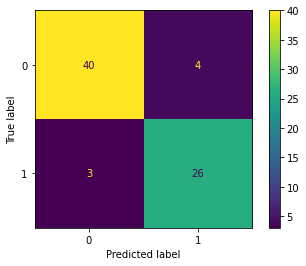

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Acurácia do modelo para os conjuntos de treino e teste

In [ ]:
print('Acuracidade (treino): ', accuracy_score(y_train, y_trei))
print('Acuracidade (teste): ', accuracy_score(y_test, y_pred))


Acuracidade (treino):  0.9822485207100592
Acuracidade (teste):  0.9041095890410958


Precisão, Recall e F1 Score dos teste em relação à predição

In [ ]:
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
f1 = f1_score(y_test, y_pred)
print('F1-Score: %f' % f1)

Precision:  0.8666666666666667
Recall:  0.896551724137931
F1-Score: 0.881356


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



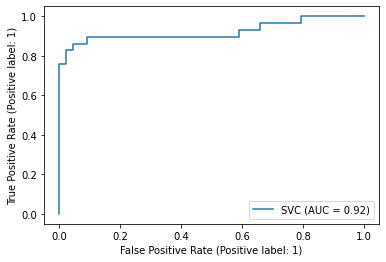

In [ ]:
plot_roc_curve(svmClf,x_test, y_test)

Separação dos parâmetros a serem utilizados

In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid','poly','linear']}
               
modelGS = GridSearchCV(svmClf, parameters)

## Estabilidade dos dados utilizando Shap

In [ ]:
shap.initjs()
explainer = shap.KernelExplainer(svmClf.predict_proba, x_train, link="logit")
shap_values = explainer.shap_values(x_test, nsamples=100)
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test, link="logit")

  0%|          | 0/73 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To rep


### Variação do random state

In [ ]:
todos_acc_test_train = []
maior_acc = 0
menor_acc = 100
test_acc_diferentes_array = [-1]
random_state_array = []

for i in range(0, 500):
  svmClf = svm.SVC(kernel='rbf', C = 1, gamma = 1, probability=True)
  svmClf.fit(x_train, y_train)
  treino_e_teste = [svmClf.score( x_train, y_train), svmClf.score( x_test, y_test)]
  if maior_acc < svmClf.score(x_test, y_test):
    maior_acc = svmClf.score(x_test, y_test)
  if menor_acc > svmClf.score(x_test, y_test):
    menor_acc = svmClf.score(x_test, y_test)
  if svmClf.score(x_test, y_test) not in test_acc_diferentes_array:
    test_acc_diferentes_array.append(svmClf.score(x_test, y_test))
    random_state_array.append(i)
  if treino_e_teste not in todos_acc_test_train:
    todos_acc_test_train.append([treino_e_teste])

print('Todas as acurácias em formato [[acc_treino, acc_teste]]: ', todos_acc_test_train)
print('Menor acurácia: ', menor_acc)
print('Maior acurácia: ', maior_acc)
print('Diferentes acurácias para o teste: ', test_acc_diferentes_array)
print('Random_states para cada acurácia acima: ', random_state_array)

Todas as acurácias em formato [[acc_treino, acc_teste]]:  [[[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100592, 0.9041095890410958]], [[0.9822485207100

#Modelo KNN

Criação do modelo

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train.squeeze())

KNeighborsClassifier(n_neighbors=7)

Criação das variáveis 

In [ ]:
y_predk = knn.predict(x_test) 
y_probk = knn.predict_proba(x_test)

Acurácia do modelo para treino e teste

In [ ]:
print('Acuracidade (treino): ', knn.score(x_train, y_train ))
print('Acuracidade (teste): ', knn.score(x_test, y_test ))

Acuracidade (treino):  0.7218934911242604
Acuracidade (teste):  0.5753424657534246


Matriz de confusão

In [ ]:
y_truek = y_test
cmk = confusion_matrix(y_true, y_predk)
cmk

array([[18, 26],
       [ 5, 24]])

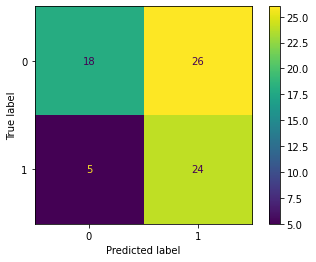

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmk)

disp.plot()
plt.show()

Curva Roc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



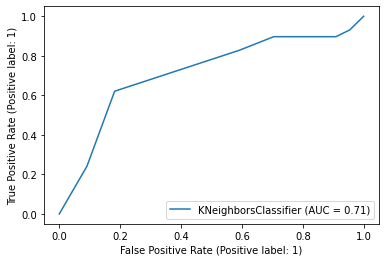

In [ ]:
plot_roc_curve(knn,x_test, y_test)

#Naive Bayes

Criação do modelo

In [ ]:
gnb = GaussianNB()

y_predN = gnb.fit(x_train, y_train).predict(x_test)
accuracy_score(y_test, y_predN)

0.6712328767123288

Acurácia para treino e teste

In [ ]:
print('Acuracidade (treino): ', gnb.score( x_train, y_train ))
print('Acuracidade (teste): ', gnb.score( x_test, y_test ))

Acuracidade (treino):  0.5621301775147929
Acuracidade (teste):  0.6712328767123288


#Modelo GBC

Criação do modelo

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)

Acurácia para treino e teste

In [ ]:
print('Acuracidade (treino): ', gbc.score( x_train, y_train ))
print('Acuracidade (teste): ', gbc.score( x_test, y_test ))

Acuracidade (treino):  1.0
Acuracidade (teste):  0.7397260273972602


In [ ]:
mod.columns

Index(['Salario Mês', 'Idade', 'Novo Salario', 'Tempo de casa', 'Estado_BA',
       'Estado_CE', 'Estado_DF', 'Estado_GO', 'Estado_MA', 'Estado_MG',
       'Estado_MS', 'Estado_PA', 'Estado_PB', 'Estado_PE', 'Estado_PR',
       'Estado_RJ', 'Estado_RN', 'Estado_RS', 'Estado_SC', 'Estado_SE',
       'Estado_SP', 'Genero_Feminino', 'Genero_Masculino',
       'Estado Civil_Casado', 'Estado Civil_Divorciado',
       'Estado Civil_Separado', 'Estado Civil_Solteiro',
       'Estado Civil_UniãoEstável', 'Cargo_Arquiteto', 'Cargo_ArquitetoSr',
       'Cargo_AssistenteI', 'Cargo_AssistenteII', 'Cargo_AuxiliardeLimpeza',
       'Cargo_ComercialIS', 'Cargo_ComercialPl', 'Cargo_Consultor',
       'Cargo_DevEspecialista', 'Cargo_DevJr', 'Cargo_DevPl', 'Cargo_DevSr',
       'Cargo_Diretor', 'Cargo_EducaçãoPl', 'Cargo_Estagiaria',
       'Cargo_FinanceiroJr', 'Cargo_FuncionalEspecialista',
       'Cargo_FuncionalJr', 'Cargo_FuncionalPl', 'Cargo_FuncionalSr',
       'Cargo_Gerente', 'Cargo_GerenteCSSr

In [ ]:
base.columns

Index(['Matricula', 'Dt Admissao', 'Dt Saida', 'Tipo Saida', 'Cargo',
       'Salario Mês', 'Dt Nascimento', 'Genero', 'Estado Civil',
       'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade', 'Tempo de casa',
       'Situacao'],
      dtype='object')

In [ ]:
import plotly.express as px

df = px.data.tips()
fig = px.box(df, x=base['Salario Mês'], y=base["Idade"])
fig.show()